In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Exoplanet Radial Velocity Measurements
The Keplerian model for the radial velocity of a star is

R
V
(
t
)
=
R
V
0
+
R
V
t
r
e
n
d
t
+
K
[
cos
(
ω
+
f
(
t
)
)
+
e
cos
(
ω
)
]
where 
R
V
0
 is the mean radial velocity of the star, 
R
V
t
r
e
n
d
 is the slope of the RV trend, 
K
 is the amplitude, 
ω
 is the argument of periastron, 
f
(
t
)
 is the true anomaly, and 
e
 the eccentricity of the obrit.

In [14]:
#Implement Kepler's eqn using newtons method to find roots

def kepler(M,e):
    E0 = M
    E = E0
    
    for i in range(200):
        g = E0 - e*np.sin(E0) - M
        gp = 1 - np.cos(E0)
        E = E0 - g/gp
        
        if np.abs((E-E0)/E <=1e-11):
            return E
        E0=E
    return E

In [15]:
a_earth = 149.6e6
e_earth = 0.0167
w_earth = 288.1*np.pi/180
P_earth = 365.256

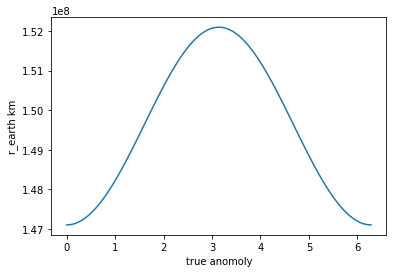

In [16]:
f = np.linspace(0, 2*np.pi,100)
r_earth = a_earth*(1-e_earth**2)/(1+e_earth*np.cos(f))

plt.plot(f, r_earth)
plt.xlabel('true anomoly')
plt.ylabel('r_earth km');

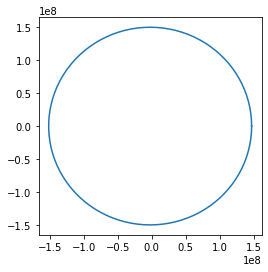

In [17]:
plt.figure(figsize=(4,4))
plt.plot(r_earth*np.cos(f), r_earth*np.sin(f));

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


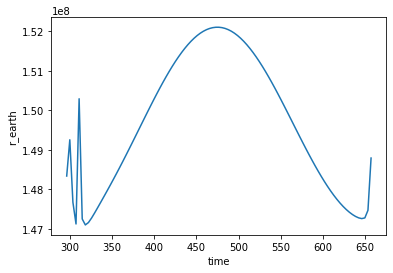

In [23]:
n = 2*np.pi/P_earth
phi0 = 0
t0 = (phi0 + w_earth)/n

t = np.linspace(t0, t0+ 365, 100)
M = n*t - (phi0+ w_earth)
f = np.array([kepler(m, e_earth) for m in M])
r_earth = a_earth * (1-e_earth**2)/(1+e_earth*np.cos(f))

plt.plot(t,r_earth)
plt.xlabel('time')
plt.ylabel('r_earth');

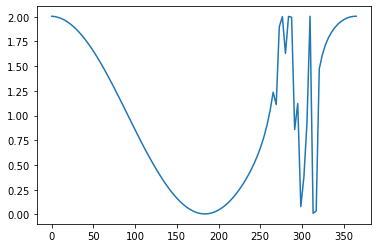

In [25]:
K = 1
rv_earth = K + (np.cos(w_earth + f) + e_earth*np.cos(w_earth))
plt.plot(t, rv_earth)